# Ames Housing Dataset

Credits to:
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard and
https://www.kaggle.com/laurenstc/top-2-of-leaderboard-advanced-fe

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import scipy
from scipy.stats import norm, skew
import math

##Settings
pd.options.display.max_rows = 30
pd.options.display.max_columns = 100
pd.options.display.float_format = '{:.4f}'.format
from IPython.display import display, HTML
import warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
df =  pd.concat(objs=[train, test], axis=0).reset_index(drop=True)
df["LSalePrice"] = np.log(df["SalePrice"])
temp=df.columns.values.tolist()
temp.remove("SalePrice")
temp.remove("LSalePrice")
col=["SalePrice","LSalePrice"]+temp
df=df[col]

In [3]:
df.head()

SalePrice  LSalePrice  1stFlrSF  2ndFlrSF  3SsnPorch Alley  BedroomAbvGr  \
0 208500.0000     12.2477       856       854          0   NaN             3   
1 181500.0000     12.1090      1262         0          0   NaN             3   
2 223500.0000     12.3172       920       866          0   NaN             3   
3 140000.0000     11.8494       961       756          0   NaN             3   
4 250000.0000     12.4292      1145      1053          0   NaN             4   

  BldgType BsmtCond BsmtExposure  BsmtFinSF1  BsmtFinSF2 BsmtFinType1  \
0     1Fam       TA           No    706.0000      0.0000          GLQ   
1     1Fam       TA           Gd    978.0000      0.0000          ALQ   
2     1Fam       TA           Mn    486.0000      0.0000          GLQ   
3     1Fam       Gd           No    216.0000      0.0000          ALQ   
4     1Fam       TA           Av    655.0000      0.0000          GLQ   

  BsmtFinType2  BsmtFullBath  BsmtHalfBath BsmtQual  BsmtUnfSF CentralAir  \
0          Unf        1.0000        0.0000       Gd   150.0000          Y   
1          Unf        0.0000        1.0000       Gd   284.0000          Y   
2          Unf        1.0000        0.0000       Gd   434.0000          Y   
3          Unf        1.0000        0.0000       TA   540.0000          Y   
4          Unf        1.0000        0.0000       Gd   490.0000          Y   

  Condition1 Condition2 Electrical  EnclosedPorch ExterCond ExterQual  \
0       Norm       Norm      SBrkr              0        TA        Gd   
1      Feedr       Norm      SBrkr              0        TA        TA   
2       Norm       Norm      SBrkr              0        TA        Gd   
3       Norm       Norm      SBrkr            272        TA        TA   
4       Norm       Norm      SBrkr              0        TA        Gd   

  Exterior1st Exterior2nd Fence FireplaceQu  Fireplaces Foundation  FullBath  \
0     VinylSd     VinylSd   NaN         NaN           0      PConc         2   
1     MetalSd     MetalSd   NaN          TA           1     CBlock         2   
2     VinylSd     VinylSd   NaN          TA           1      PConc         2   
3     Wd Sdng     Wd Shng   NaN          Gd           1     BrkTil         1   
4     VinylSd     VinylSd   NaN          TA           1      PConc         2   

  Functional  GarageArea  GarageCars GarageCond GarageFinish GarageQual  \
0        Typ    548.0000      2.0000         TA          RFn         TA   
1        Typ    460.0000      2.0000         TA          RFn         TA   
2        Typ    608.0000      2.0000         TA          RFn         TA   
3        Typ    642.0000      3.0000         TA          Unf         TA   
4        Typ    836.0000      3.0000         TA          RFn         TA   

  GarageType  GarageYrBlt  GrLivArea  HalfBath Heating HeatingQC HouseStyle  \
0     Attchd    2003.0000       1710         1    GasA        Ex     2Story   
1     Attchd    1976.0000       1262         0    GasA        Ex     1Story   
2     Attchd    2001.0000       1786         1    GasA        Ex     2Story   
3     Detchd    1998.0000       1717         0    GasA        Gd     2Story   
4     Attchd    2000.0000       2198         1    GasA        Ex     2Story   

   Id  KitchenAbvGr KitchenQual LandContour LandSlope  LotArea LotConfig  \
0   1             1          Gd         Lvl       Gtl     8450    Inside   
1   2             1          TA         Lvl       Gtl     9600       FR2   
2   3             1          Gd         Lvl       Gtl    11250    Inside   
3   4             1          Gd         Lvl       Gtl     9550    Corner   
4   5             1          Gd         Lvl       Gtl    14260       FR2   

   LotFrontage LotShape  LowQualFinSF  MSSubClass MSZoning  MasVnrArea  \
0      65.0000      Reg             0          60       RL    196.0000   
1      80.0000      Reg             0          20       RL      0.0000   
2      68.0000      IR1             0          60       RL    162.0000   
3      60.0000      IR

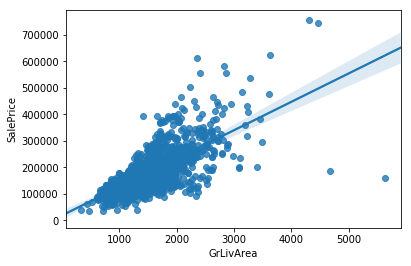

In [4]:
p=sns.regplot(x="GrLivArea",y="SalePrice",data=df)

In [5]:
df=df.drop(df.index[[1298,523]])

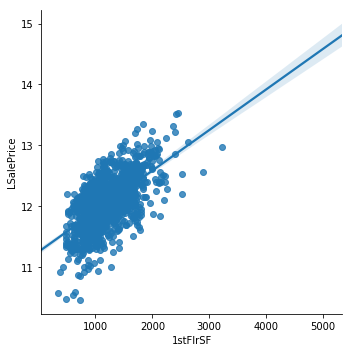

In [6]:
g=sns.lmplot(x="1stFlrSF",y="LSalePrice",data=df)

In [7]:
del df["LSalePrice"]

### Check normality

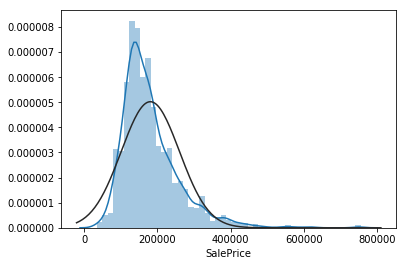

In [8]:
sns.distplot(train['SalePrice'],fit=norm)

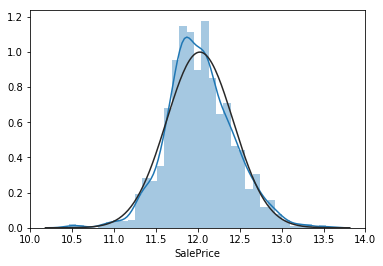

In [9]:
sns.distplot(np.log(train['SalePrice']),fit=norm)

### Filling missing values

In [18]:
aa=df.isnull().sum()
with pd.option_context('display.max_rows', 100, 'display.max_columns', 3):
    print(aa[aa>0].sort_values(ascending=False))

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtCond          82
BsmtExposure      82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
GarageCars         1
KitchenQual        1
SaleType           1
dtype: int64


In [37]:
del df["Utilities"]

In [36]:
df["LotFrontage"]=df.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [35]:
for col in ("SaleType","MSZoning","KitchenQual","Functional","Exterior1st","Exterior2nd","Electrical",\
            "BsmtFullBath","BsmtHalfBath"):
    df[col].fillna(df[col].value_counts().idxmax(),inplace=True)

In [32]:
for col in ("BsmtFinSF1","BsmtFinSF2","MasVnrArea","TotalBsmtSF","BsmtUnfSF","GarageArea","GarageCars","GarageYrBlt"):
    df[col].fillna(0,inplace=True)

In [33]:
for col in ("GarageType", "GarageFinish", "GarageQual", "GarageCond",\
            "BsmtFinType1","BsmtFinType2","BsmtQual","BsmtExposure","BsmtCond","MasVnrType",\
            "Alley","PoolQC","MiscFeature","Fence","FireplaceQu"):
    df[col].fillna("None",inplace=True)

In [38]:
df.isnull().sum()[df.isnull().sum()>0]

SalePrice    1459
dtype: int64

### Numerical to categorical 

In [216]:
df["MoSold"]=df["MoSold"].astype(str)
df["YrSold"]=df["YrSold"].astype(str)
df["MSSubClass"]=df["MSSubClass"].astype(str)

In [46]:
df.columns

Index(['SalePrice', '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley',
       'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath',
       'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1',
       'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual',
       'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces',
       'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id',
       'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea',
       'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass',
       'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal',
       'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'P

### Correcting skew

In [65]:
from scipy.stats import skew

In [66]:
columns=df.columns.values

In [67]:
numeric_dtypes = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerics2 = []
for i in df.columns:
    if df[i].dtype in numeric_dtypes: 
        numerics2.append(i)

skew_features = df[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

skew
MiscVal       21.9397
PoolArea      17.6887
LotArea       13.1095
LowQualFinSF  12.0845
3SsnPorch     11.3721
KitchenAbvGr   4.3006
BsmtFinSF2     4.1445
EnclosedPorch  4.0023
ScreenPorch    3.9451
BsmtHalfBath   3.9300
MasVnrArea     2.6217
OpenPorchSF    2.5294
WoodDeckSF     1.8448
MSSubClass     1.3751
1stFlrSF       1.2573
LotFrontage    1.1030
GrLivArea      1.0688
TotalSF        1.0092
BsmtFinSF1     0.9806
BsmtUnfSF      0.9197
2ndFlrSF       0.8616
TotRmsAbvGrd   0.7492
Fireplaces     0.7253
HalfBath       0.6967
TotalBsmtSF    0.6718
BsmtFullBath   0.6224
OverallCond    0.5693
BedroomAbvGr   0.3266
GarageArea     0.2169
MoSold         0.1973
OverallQual    0.1896
FullBath       0.1655
YrSold         0.1320
Id            -0.0009
GarageCars    -0.2193
YearRemodAdd  -0.4501
YearBuilt     -0.5992
GarageYrBlt   -3.9046
SalePrice         nan

In [85]:
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

In [80]:
high_skew=skew_features[skew_features>1]

In [83]:
index=high_skew.index

In [88]:
for i in index:
    df[i]=boxcox1p(df[i],boxcox_normmax(df[i]+1))

In [90]:
skew_features = df[numerics2].apply(lambda x: skew(x)).sort_values(ascending=False)
skews = pd.DataFrame({'skew':skew_features})
skews

skew
PoolArea      15.5951
3SsnPorch      8.8620
LowQualFinSF   8.4926
MiscVal        5.2380
BsmtHalfBath   3.7794
KitchenAbvGr   3.7783
ScreenPorch    3.1526
BsmtFinSF2     2.5783
EnclosedPorch  2.1491
BsmtFinSF1     0.9806
MasVnrArea     0.9776
BsmtUnfSF      0.9197
2ndFlrSF       0.8616
WoodDeckSF     0.7856
TotRmsAbvGrd   0.7492
Fireplaces     0.7253
HalfBath       0.6967
TotalBsmtSF    0.6718
BsmtFullBath   0.6224
OpenPorchSF    0.6212
OverallCond    0.5693
MSSubClass     0.4378
BedroomAbvGr   0.3266
GarageArea     0.2169
MoSold         0.1973
OverallQual    0.1896
FullBath       0.1655
YrSold         0.1320
LotFrontage    0.0592
TotalSF        0.0285
GrLivArea      0.0088
Id            -0.0009
1stFlrSF      -0.0078
LotArea       -0.1381
GarageCars    -0.2193
YearRemodAdd  -0.4501
YearBuilt     -0.5992
GarageYrBlt   -3.9046
SalePrice         nan

### Feature engineering

In [91]:
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [176]:
df["RemodAdd"]= (df["YearBuilt"]!=df["YearRemodAdd"]).apply(int)

### Model

In [178]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate, GridSearchCV, KFold, cross_val_score
from sklearn.base import clone, BaseEstimator

##Regressors
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [284]:
df_dummies=pd.get_dummies(data=df)
train_dummies=df_dummies[:1458]
test_dummies=df_dummies[1458:]
X=train_dummies.drop(columns="SalePrice")
y=train_dummies["SalePrice"].values
X_test=test_dummies.drop(columns="SalePrice")
print("X shape: %d x %d." % (X.shape[0],X.shape[1]))
print("Length y: %d" % (len(y)))
print("X_test shape: %d x %d." % (X_test.shape[0],X_test.shape[1]))

X shape: 1458 x 302.
Length y: 1458
X_test shape: 1459 x 302.


### Outliers

In [285]:
import statsmodels.api as sm

In [286]:
X.head()

1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0    5.9390       854     0.0000             3    706.0000      0.0000   
1    6.2350         0     0.0000             3    978.0000      0.0000   
2    5.9943       866     0.0000             3    486.0000      0.0000   
3    6.0277       756     0.0000             3    216.0000      0.0000   
4    6.1612      1053     0.0000             4    655.0000      0.0000   

   BsmtFullBath  BsmtHalfBath  BsmtUnfSF  EnclosedPorch  Fireplaces  FullBath  \
0        1.0000        0.0000   150.0000         0.0000           0         2   
1        0.0000        0.7109   284.0000         0.0000           1         2   
2        1.0000        0.0000   434.0000         0.0000           1         2   
3        1.0000        0.0000   540.0000        16.0207           1         1   
4        1.0000        0.0000   490.0000         0.0000           1         2   

   GarageArea  GarageCars  GarageYrBlt  GrLivArea  HalfBath  Id  KitchenAbvGr  \
0    548.0000      2.0000    2003.0000     8.3535         1   1        0.7510   
1    460.0000      2.0000    1976.0000     7.9747         0   2        0.7510   
2    608.0000      2.0000    2001.0000     8.4081         1   3        0.7510   
3    642.0000      3.0000    1998.0000     8.3587         0   4        0.7510   
4    836.0000      3.0000    2000.0000     8.6693         1   5        0.7510   

   LotArea  LotFrontage  LowQualFinSF  MSSubClass  MasVnrArea  MiscVal  \
0  13.8331      18.1446        0.0000      6.4997     19.4332   0.0000   
1  14.1179      20.6736        0.0000      4.2497      0.0000   0.0000   
2  14.4765      18.6680        0.0000      6.4997     17.7688   0.0000   
3  14.1062      17.2497        0.0000      6.8625      0.0000   0.0000   
4  15.0220      21.3143        0.0000      6.4997     25.4042   0.0000   

   MoSold  OpenPorchSF  OverallCond  OverallQual  PoolArea  ScreenPorch  \
0       2      12.0803            5            7    0.0000       0.0000   
1       5       0.0000            8            6    0.0000       0.0000   
2       9       9.9011            5            7    0.0000       0.0000   
3       2       8.9661            5            7    0.0000       0.0000   
4      12      14.2716            5            8    0.0000       0.0000   

   TotRmsAbvGrd  TotalBsmtSF  WoodDeckSF  YearBuilt  YearRemodAdd  YrSold  \
0             8     856.0000      0.0000       2003          2003    2008   
1             6    1262.0000     56.1842       1976          1976    2007   
2             6     920.0000      0.0000       2001          2002    2008   
3             7     756.0000      0.0000       1915          1970    2006   
4             9    1145.0000     42.2457       2000          2000    2008   

   RemodAdd   TotalSF  Alley_Grvl  Alley_None  Alley_Pave  BldgType_1Fam  \
0         0 1715.9390           0           1           0              1   
1         0 1268.2350           0           1           0              1   
2         1 1791.9943           0           1           0              1   
3         1 1518.0277           0           1           0              1   
4         0 2204.1612           0           1           0              1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   
3                0                0               0                0   
4                0                0               0                0   

   BsmtCond_Fa  BsmtCond_Gd  BsmtCond_None     ...       Neighborhood_NAmes  \
0            0            0              0     ...                        0   
1            0            0              0     ...                        0   
2            0            0              0     ...                        0   
3            0     

In [287]:
ols = sm.OLS(np.array(y), np.array(X)).fit()
pred=ols.predict()
test=ols.outlier_test()
test2=pd.DataFrame(test)
outliers=test2[abs(test2[0])>6].index

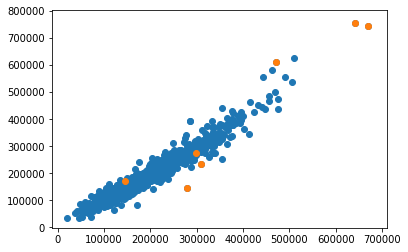

In [288]:
plt.scatter(pred,y)
plt.scatter(np.array([pred[i] for i in outliers]),np.array([y[i] for i in outliers]))
plt.show()

In [289]:
X = X.drop(X.index[outliers])
y = np.delete(y,outliers)

In [290]:
len(X)

1451

In [291]:
len(y)

1451

### Preprocessing

In [301]:
from sklearn.pipeline import make_pipeline

In [302]:
from sklearn.preprocessing import RobustScaler

In [314]:
model=make_pipeline(RobustScaler(),Lasso(alpha=0.0005)).fit(X=X,y=y)

In [315]:
def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, np.log(y), 
                                   scoring="neg_mean_squared_error", 
                                   cv = kf))
    return(rmse)

In [316]:
cv_rmse(model).mean()

0.10692199001925276

In [318]:
model2=make_pipeline(RobustScaler(),Ridge(alpha=10)).fit(X=X,y=y)

In [319]:
cv_rmse(model2).mean()

0.10966266651114205

### Cross validation

In [292]:
def root_mean_squared_error(truth,predictions):
    return np.sqrt(sum((truth-predictions) ** 2)/len(truth))
rmse_scorer=make_scorer(root_mean_squared_error,greater_is_better=False)

In [293]:
regr=[LinearRegression(),Lasso(alpha=0.0005),Ridge(alpha=10),XGBRegressor(max_depth=3),\
      RandomForestRegressor(max_depth=25,n_estimators=60)]
regr=[LinearRegression(),Lasso(alpha=0.0005),Ridge(alpha=10),ElasticNet(alpha=0.001),\
      KernelRidge(),XGBRegressor(n_estimators=3460,max_depth=3)]
regr=[LinearRegression(),Lasso(alpha=0.0005),Ridge(alpha=10),ElasticNet(alpha=0.001),\
      KernelRidge()]

In [294]:
kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train.values)

In [295]:
def cross_validation(regr=regr,X_train=X,y_train=np.log(y),scoring=rmse_scorer,cv=kf):
    names=[]
    mean_test_scores=[]
    test_stds=[]
    mean_train_scores=[]
    train_stds=[]
    outcomes={}
    
    for r in regr:
        name=r.__class__.__name__
        names.append(name)
        outcomes[name]=cross_validate(r,X_train,y_train,scoring=scoring,cv=cv)
        
        mean_test_scores.append(-outcomes[name]["test_score"].mean())
        test_stds.append(outcomes[name]["test_score"].std())
        mean_train_scores.append(-outcomes[name]["train_score"].mean())
        train_stds.append(outcomes[name]["train_score"].std())
        
        r.fit(X_train,y_train)
        
    
    
    regr_results=pd.DataFrame({"Regressor":names,"Mean train score":mean_train_scores,\
                               "Train std":train_stds,"Mean test score":mean_test_scores,\
                                "test_std":test_stds},index=np.arange(len(names)))
    display(regr_results)
    
    return outcomes

In [296]:
outcomes=cross_validation()

Regressor  Mean train score  Train std  Mean test score    test_std
0  LinearRegression            0.0840     0.0015      141061.2436 282122.2443
1             Lasso            0.0940     0.0018           0.1072      0.0074
2             Ridge            0.0910     0.0016           0.1102      0.0069
3        ElasticNet            0.0943     0.0018           0.1075      0.0074
4       KernelRidge            0.0852     0.0017           0.1140      0.0082
5      XGBRegressor            0.0019     0.0000           0.1157      0.0061

### Parameter tuning

In [299]:
lasso=[Lasso(alpha=0.0001),Lasso(alpha=0.0005),Lasso(alpha=0.001),Lasso(alpha=0.005),Lasso(alpha=0.01)]

In [300]:
outcomes=cross_validation(regr=lasso)

Regressor  Mean train score  Train std  Mean test score  test_std
0     Lasso            0.0863     0.0016           0.1119    0.0071
1     Lasso            0.0940     0.0018           0.1072    0.0074
2     Lasso            0.0996     0.0018           0.1091    0.0075
3     Lasso            0.1237     0.0018           0.1281    0.0059
4     Lasso            0.1305     0.0015           0.1338    0.0048

In [297]:
ridge=[Ridge(alpha=0.1),Ridge(alpha=1),Ridge(alpha=5),Ridge(alpha=10),Ridge(alpha=15),Ridge(alpha=20),Ridge(alpha=100)]

In [298]:
outcomes=cross_validation(regr=ridge)

Regressor  Mean train score  Train std  Mean test score  test_std
0     Ridge            0.0839     0.0016           0.1192    0.0092
1     Ridge            0.0850     0.0016           0.1142    0.0080
2     Ridge            0.0883     0.0017           0.1106    0.0072
3     Ridge            0.0910     0.0016           0.1102    0.0069
4     Ridge            0.0931     0.0016           0.1104    0.0068
5     Ridge            0.0947     0.0016           0.1108    0.0068
6     Ridge            0.1060     0.0016           0.1160    0.0065

In [320]:
elastic=[ElasticNet(alpha=0.0001),ElasticNet(alpha=0.0005),ElasticNet(alpha=0.001),ElasticNet(alpha=0.01),ElasticNet(alpha=0.1)]

In [321]:
outcomes=cross_validation(regr=elastic)

Regressor  Mean train score  Train std  Mean test score  test_std
0  ElasticNet            0.0851     0.0016           0.1146    0.0076
1  ElasticNet            0.0898     0.0017           0.1083    0.0076
2  ElasticNet            0.0943     0.0018           0.1075    0.0074
3  ElasticNet            0.1242     0.0018           0.1286    0.0058
4  ElasticNet            0.1586     0.0010           0.1613    0.0035

In [322]:
e_par={"alpha":[0.0001,0.0004,0.001,0.01,0.1],"l1_ratio":[0.1,0.5,0.8,0.9,0.95,0.99]}

In [323]:
e_reg=GridSearchCV(ElasticNet(),e_par,scoring=rmse_scorer,cv=kf)
_=e_reg.fit(X,np.log(y))
print(e_reg.best_score_)
e_reg.best_params_

-0.10731088736511742


{'alpha': 0.0004, 'l1_ratio': 0.99}

In [483]:
xgb_parameters={"gamma":[0],"max_depth":[2,3,5]}
xgb_reg=GridSearchCV(XGBRegressor(),xgb_parameters,scoring=rmse_scorer,cv=kf)
_=xgb_reg.fit(X,np.log(y))
print(xgb_reg.best_score_)
xgb_reg.best_params_

-0.010788112830310777


{'gamma': 0, 'max_depth': 3}

In [484]:
rf_parameters={"max_depth":[15,25,35],"n_estimators":[40,60,80]}
rf_reg=GridSearchCV(RandomForestRegressor(random_state=42),rf_parameters,scoring=rmse_scorer,cv=kf)
_=rf_reg.fit(X,np.log(y))
print(rf_reg.best_score_)
rf_reg.best_params_

-0.012076477791814984


{'max_depth': 15, 'n_estimators': 60}

### Ensemble method

In [104]:
class AverageModels(BaseEstimator):
    def __init__(self, models):
        self.models=models
        
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        for m in self.models_:
            m.fit(X,y)
    
    def predict(self, X):
        predictions = np.column_stack(m.predict(X) for m in self.models_)
        return np.mean(predictions, axis=1)

In [124]:
r=AverageModels(regr[1:4])

In [125]:
cross_val_score(r,X,np.log(y),scoring=rmse_scorer,cv=kf).mean()

-0.1096308423056516

### Outcome

In [324]:
r=Lasso(alpha=0.0005)

In [325]:
r.fit(X,np.log(y))

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [326]:
pred_test=r.predict(X_test)

In [327]:
final=np.e ** pred_test

In [328]:
submission=pd.DataFrame({"Id":np.arange(1461,2920),"SalePrice":final})

In [330]:
submission.to_csv("Submission6.csv",index=False)

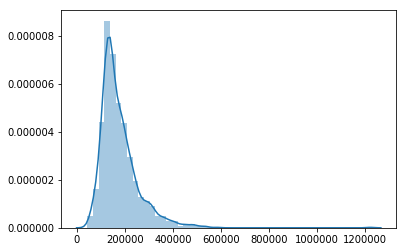

In [239]:
sns.distplot(final)